In [63]:
# import libraries we going to use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

In [64]:
# let's read and understand the data
df = pd.read_csv("D:\Codes\ML.Data/Mall_Customers.csv")

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
#  we have one obj column and the rest are int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
# data description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
# no null values so we are set to go
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [69]:
# drop columns we are not gonna use
df.drop(columns=['CustomerID'], inplace=True)

In [70]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [71]:
print('the dara shape is ' , df.shape)

the dara shape is  (200, 4)


In [72]:
# let plot our data
def Plot_fig(X_label , y_label, data , hue , title):
    '''this function for plotting data with certain hue'''
    plt.figure(1 , figsize = (15 , 6))
    sns.scatterplot(x=X_label, y=y_label, data=data, hue=hue)
    plt.title(title)
    plt.show()

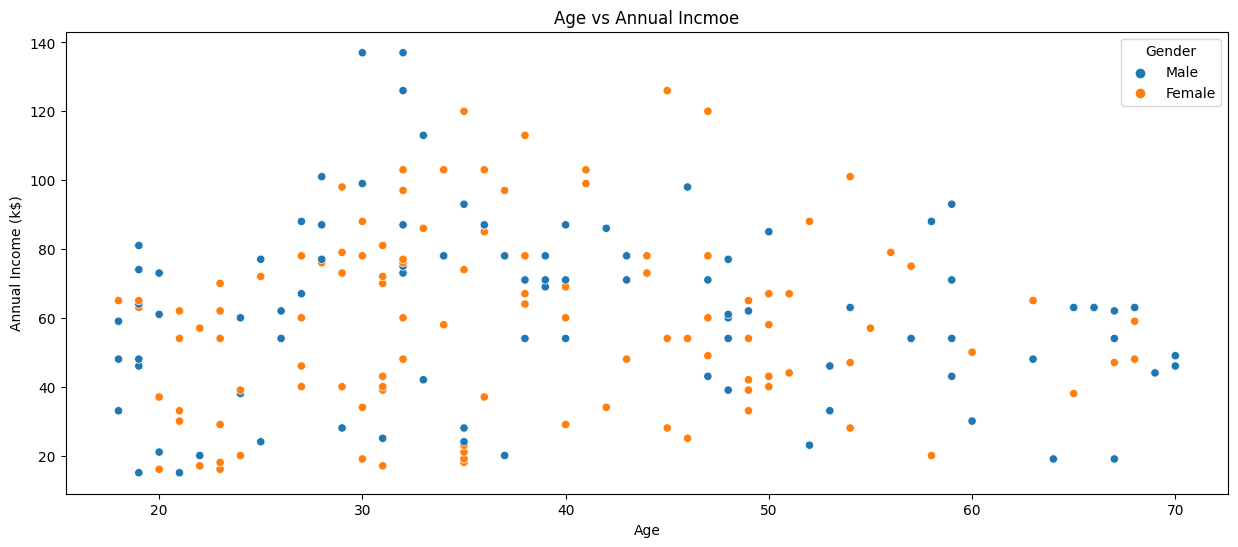

In [73]:
# plotig Age and annual income with gender as hue
Plot_fig(df["Age"] , df["Annual Income (k$)"] , df , "Gender" , "Age vs Annual Incmoe")

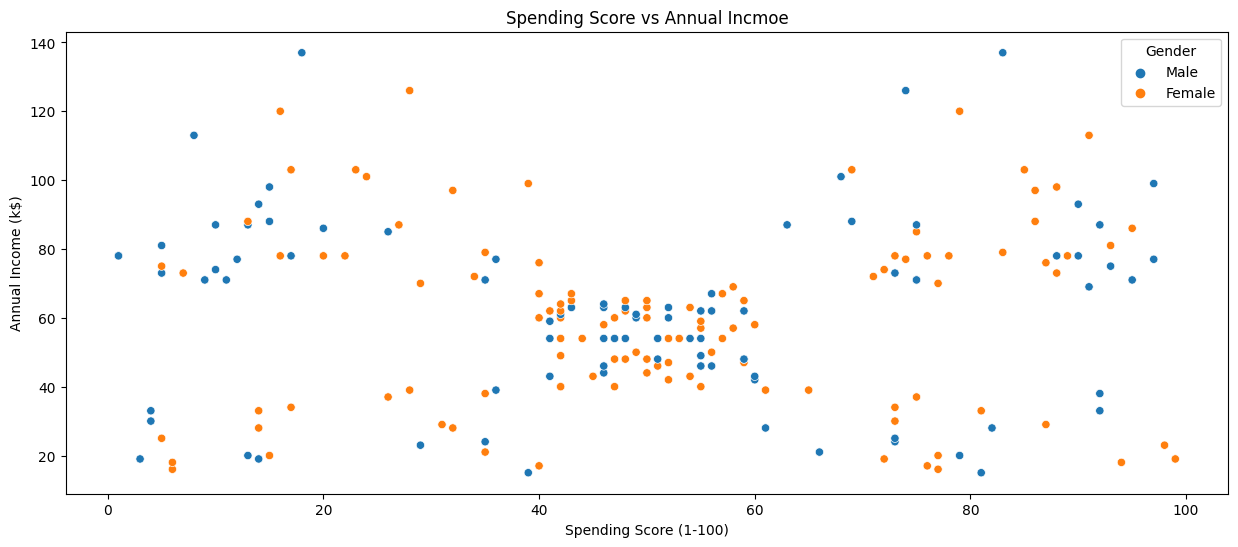

In [74]:
# plotig spending and annual income with gender as hue
Plot_fig(df["Spending Score (1-100)"] , df["Annual Income (k$)"] , df , "Gender" , "Spending Score vs Annual Incmoe")


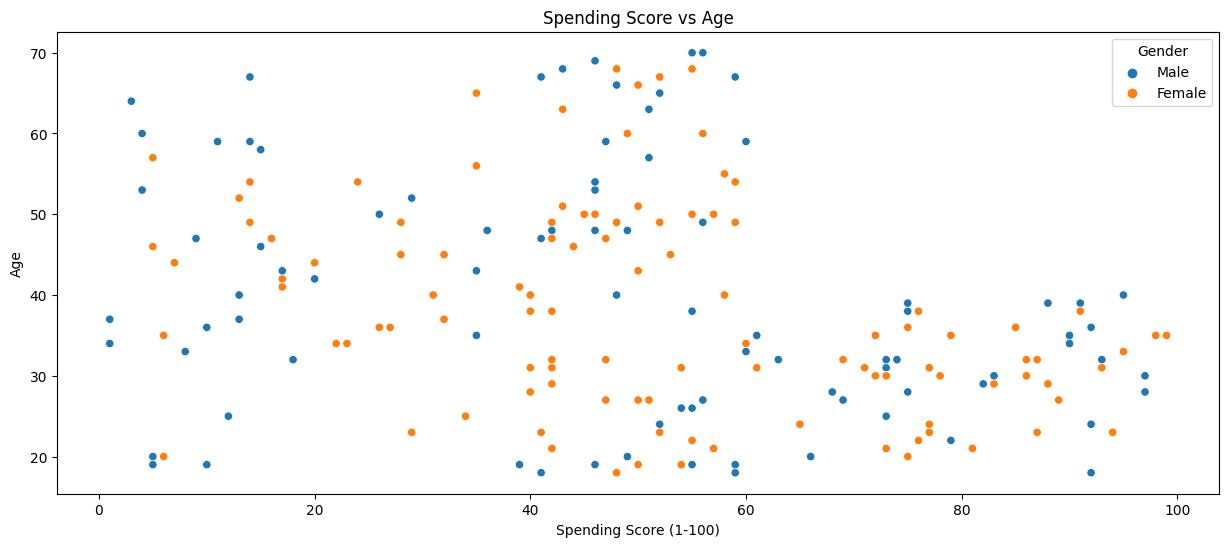

In [75]:
# plotig Age and spending score with gender as hue

Plot_fig(df["Spending Score (1-100)"] , df["Age"] , df , "Gender" , "Spending Score vs Age")


Adjust Data

In [76]:
# before  label encoding
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [77]:
# label our Gender column to int 
from sklearn.preprocessing import LabelEncoder

lb_en = LabelEncoder()
df["Gender"] = lb_en.fit_transform(df["Gender"])


In [78]:
# after encoding
df["Gender"].unique()

array([1, 0])

In [79]:
# lets check our DF 
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [80]:
print('the shape of data frame ' , df.shape)

the shape of data frame  (200, 4)


In [81]:
# set our input 
X = df.iloc[ : , :].values


In [82]:
print('the shape of data frame ' , X.shape)

the shape of data frame  (200, 4)


K-Means Cluster

In [83]:
from sklearn.cluster import KMeans


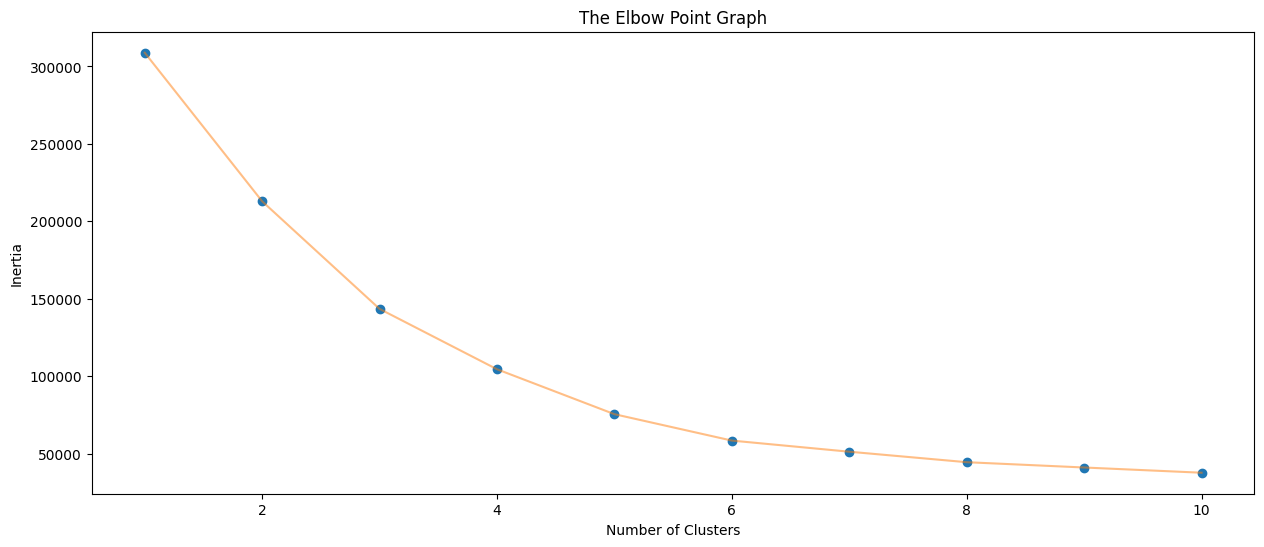

In [84]:
# Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)
# elbow to measuer K 
wcss=[] 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2 ,max_iter= 200 , )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss, '-' , alpha = 0.5)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [85]:
# set our moduel with selected n
# set our centroid and labels
kmeans = KMeans(n_clusters = 5,init='k-means++', random_state=0).fit(X)
labels = kmeans.labels_
centroid= kmeans.cluster_centers_

Useing PCA to decrease dimension of our data with setting of new label 

In [86]:
# decrease Dimensionof Data
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X) 

In [87]:
# setting new DataFrame
df["class"] = labels
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])


In [88]:
# now lets see our new DF
truth_pca_df

,pca1,pca2,class
0,-31.869945,-33.001252,0.0
1,0.764494,-56.842901,3.0
2,-57.408276,-13.124961,0.0
3,-2.168543,-53.478590,3.0
4,-32.174085,-30.388412,0.0
...,...,...,...
195,58.352515,31.017542,1.0
196,19.908001,66.446108,4.0
197,58.520804,38.346039,1.0
198,20.979130,79.376405,4.0


<Axes: xlabel='pca1', ylabel='pca2'>

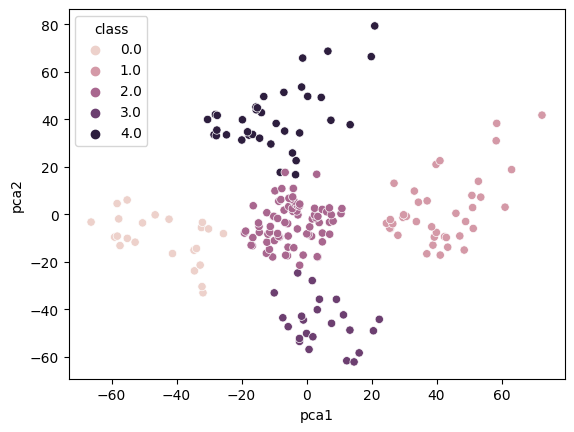

In [89]:
# plottig our new data 
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)


In [90]:
# setting our new X 
X_pca = truth_pca_df.iloc[ : , :].values


In [91]:
# now we fit X
kmeans = KMeans(n_clusters = 5,init='k-means++', random_state=0).fit(X_pca)

In [92]:
# setting our new centroid 
centroid_2 = kmeans.cluster_centers_

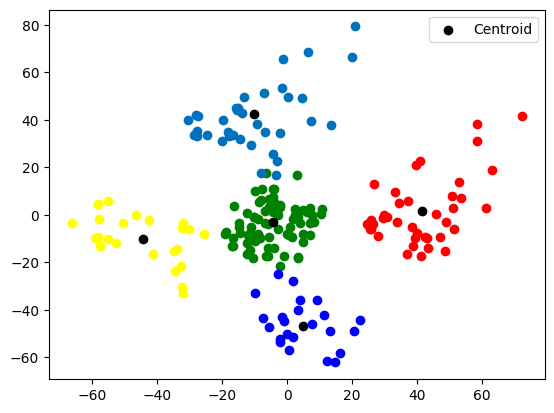

In [93]:
# now plotting of clustered data with its centroid 
truth_pca_df1 =truth_pca_df[truth_pca_df["class"]==0]
truth_pca_df2 =truth_pca_df[truth_pca_df["class"]==1]
truth_pca_df3 =truth_pca_df[truth_pca_df["class"]==2]
truth_pca_df4 =truth_pca_df[truth_pca_df["class"]==3]
truth_pca_df5 =truth_pca_df[truth_pca_df["class"]==4]


plt.scatter(truth_pca_df1["pca1"] ,truth_pca_df1["pca2"], color = "yellow")
plt.scatter(truth_pca_df2["pca1"] ,truth_pca_df2["pca2"], color = "red")
plt.scatter(truth_pca_df3["pca1"] ,truth_pca_df3["pca2"], color = "green")
plt.scatter(truth_pca_df4["pca1"] ,truth_pca_df4["pca2"], color = "blue")
plt.scatter(truth_pca_df5["pca1"] ,truth_pca_df5["pca2"], color = "#0072BD")

plt.scatter(centroid_2[ : , 0], centroid_2[ : , 1]  , c="black" , label="Centroid" )
plt.legend()